In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.preprocessing import scale

In [7]:
df = pd.read_csv("data.csv")

In [8]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [9]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

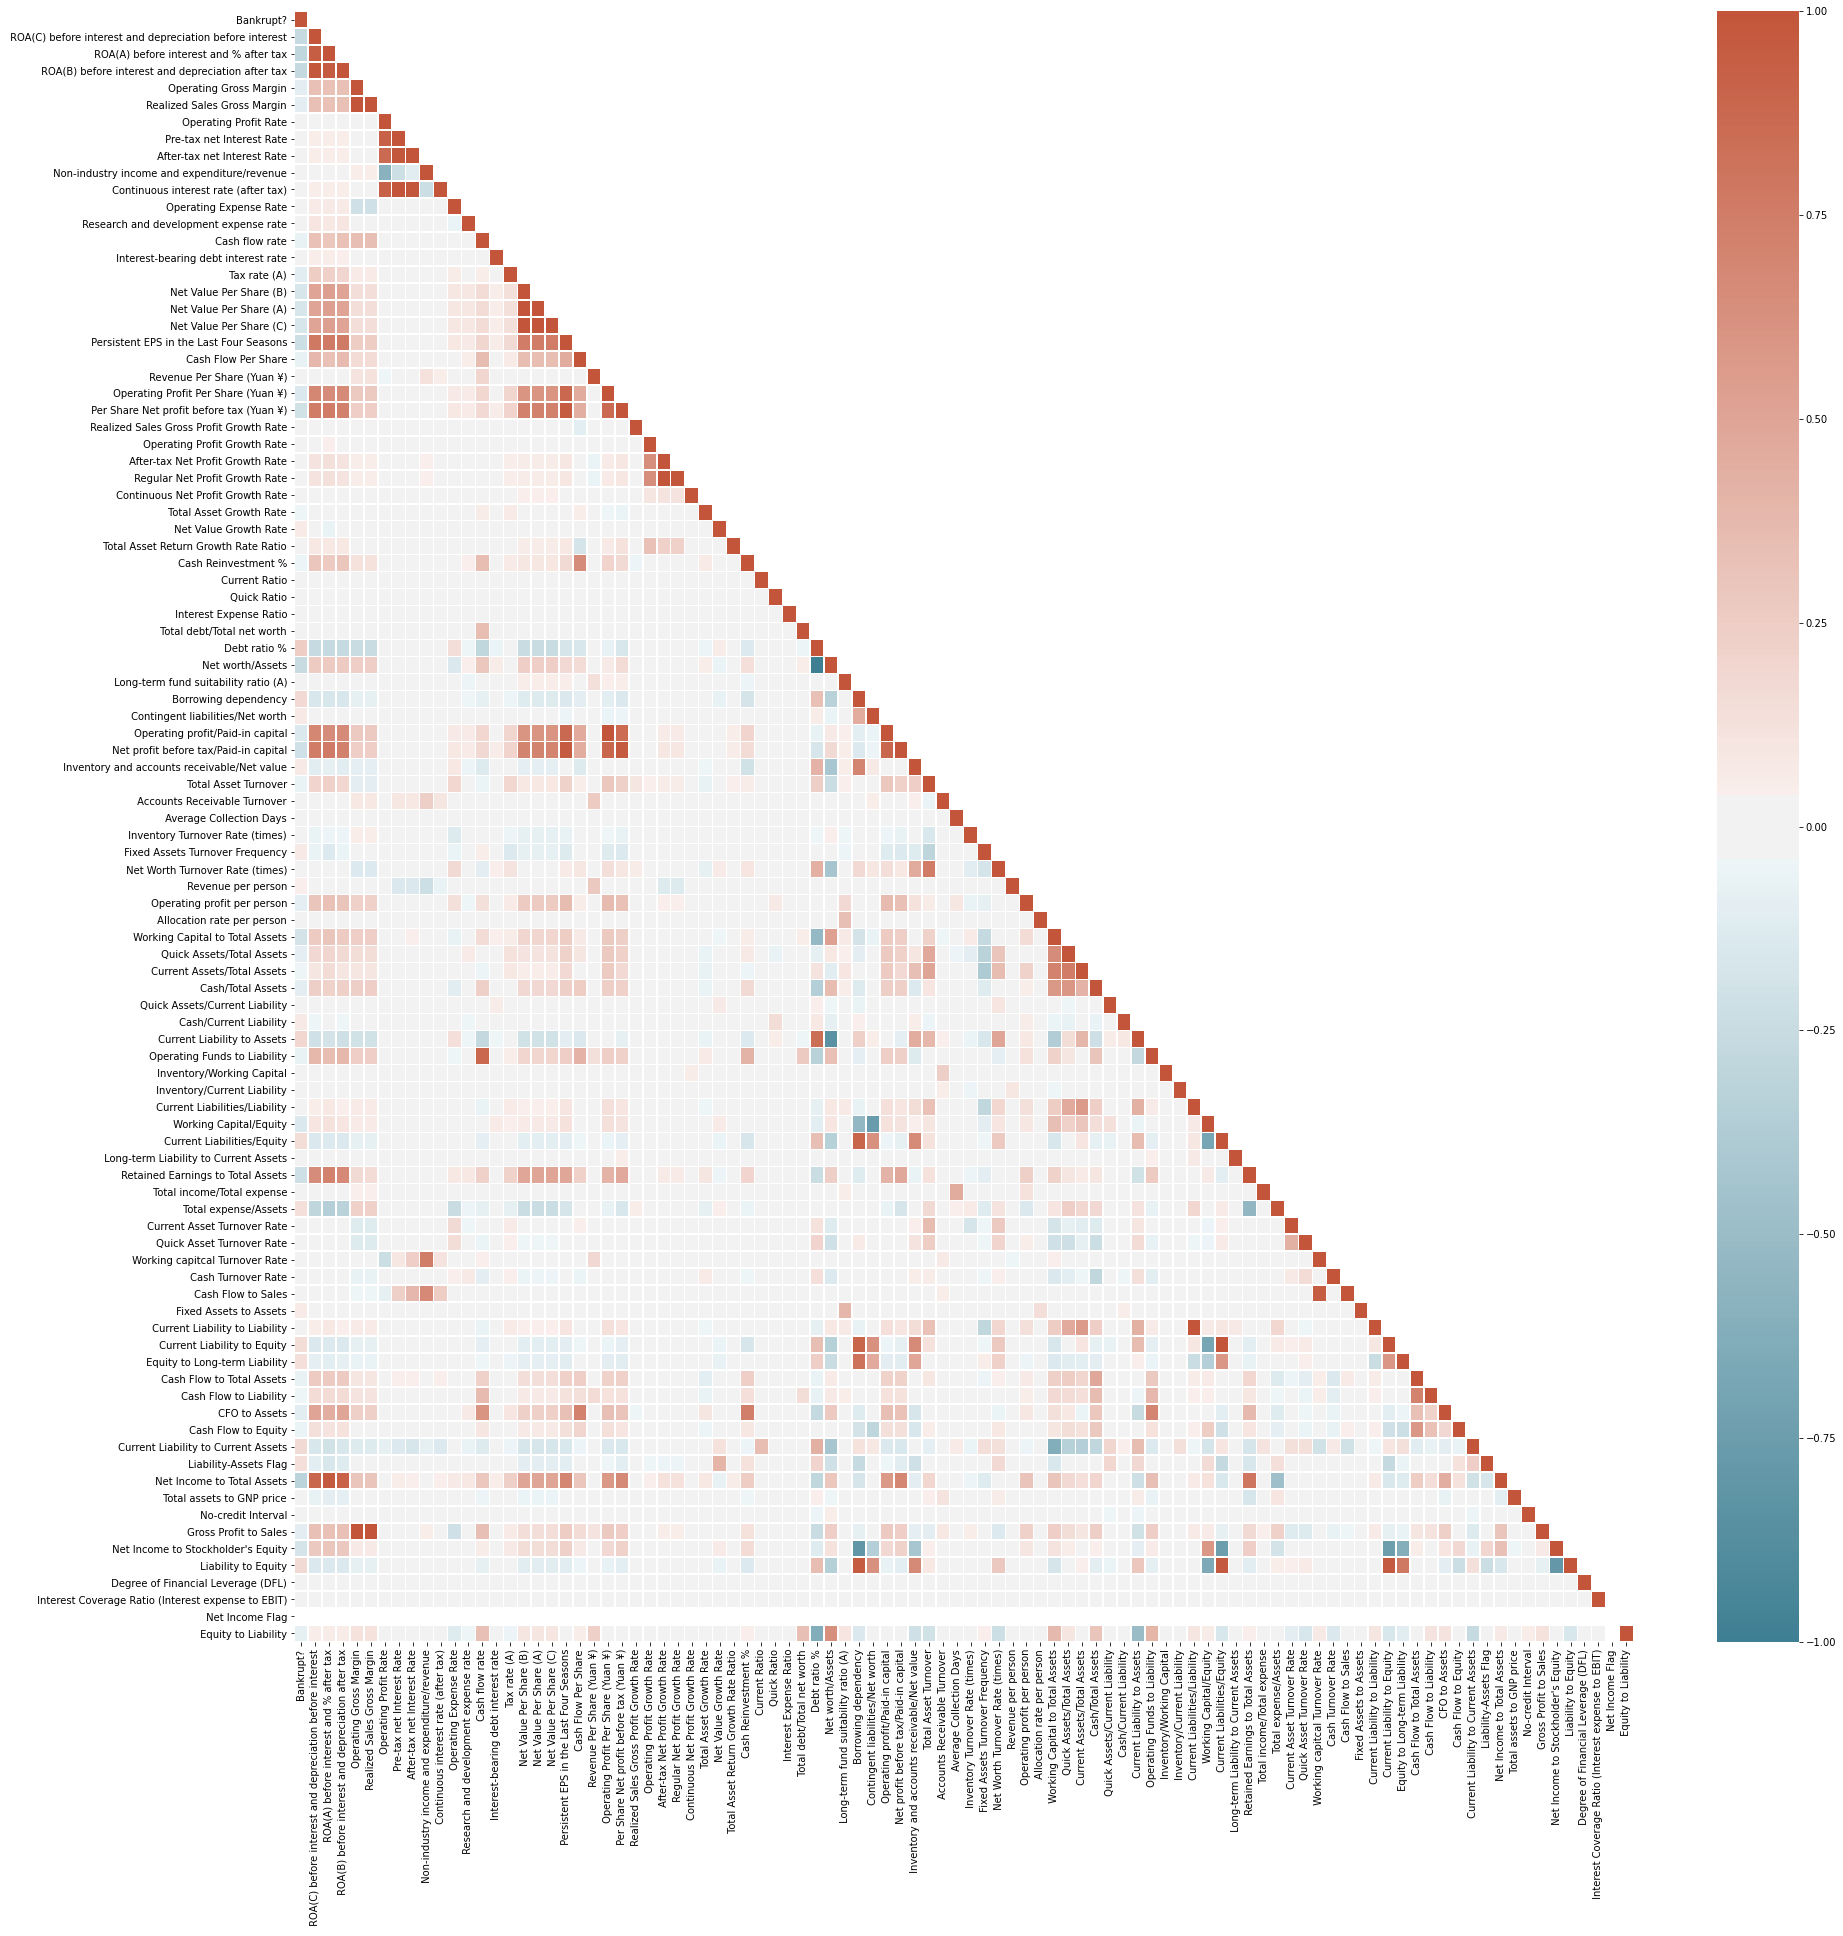

In [10]:
corr_mat = df.corr()
#lower trainglular part of the correlation matrix
lt_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))

fig, ax = plt.subplots(figsize=(30,30))   

cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(lt_mat, linewidths=0.5,cmap=cmap, ax=ax)
plt.show()

In [16]:

def standardize(df):

    df_copy = df.copy()
    for column in df_copy.columns:
        
        if df_copy[column].max() == df_copy[column].min():
            df_copy[column] = df_copy[column]/df_copy[column].min()    
        else:
            df_copy[column] = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()  
        
    return df_copy

def robust_scaling(df):

    df_copy = df.copy()
    
    for column in df_copy.columns:
        if df_copy[column].max() == df_copy[column].min():
            df_copy[column] = df_copy[column]/df_copy[column].min()
        else:
            quantile_diff = (df_copy[column].quantile(0.75) - df_copy[column].quantile(0.25))
            if quantile_diff != 0:
                df_copy[column] = (df_copy[column] - df_copy[column].median())  / (df_copy[column].quantile(0.75) - df_copy[column].quantile(0.25))
            else:
                df_copy[column] = (df_copy[column] - df_copy[column].median())  / df_copy[column].std() 
            
    return df_copy

In [24]:
Y = df['Bankrupt?']
X = df.drop('Bankrupt?', axis=1)

X = standardize(X)

x = X.values
y = Y.values

print("Bankrupt?")
print("No   : " , df['Bankrupt?'].value_counts()[0] , " -> ", round( 100*df['Bankrupt?'].value_counts()[0]/len(df) ),"%" )
print("Yes  : " , df['Bankrupt?'].value_counts()[1] , "  -> ", round( 100*df['Bankrupt?'].value_counts()[1]/len(df) ),"%" )

print(x.shape)
print(y.shape)

Bankrupt?
No   :  6599  ->  97.0 %
Yes  :  220   ->  3.0 %
(6819, 95)
(6819,)


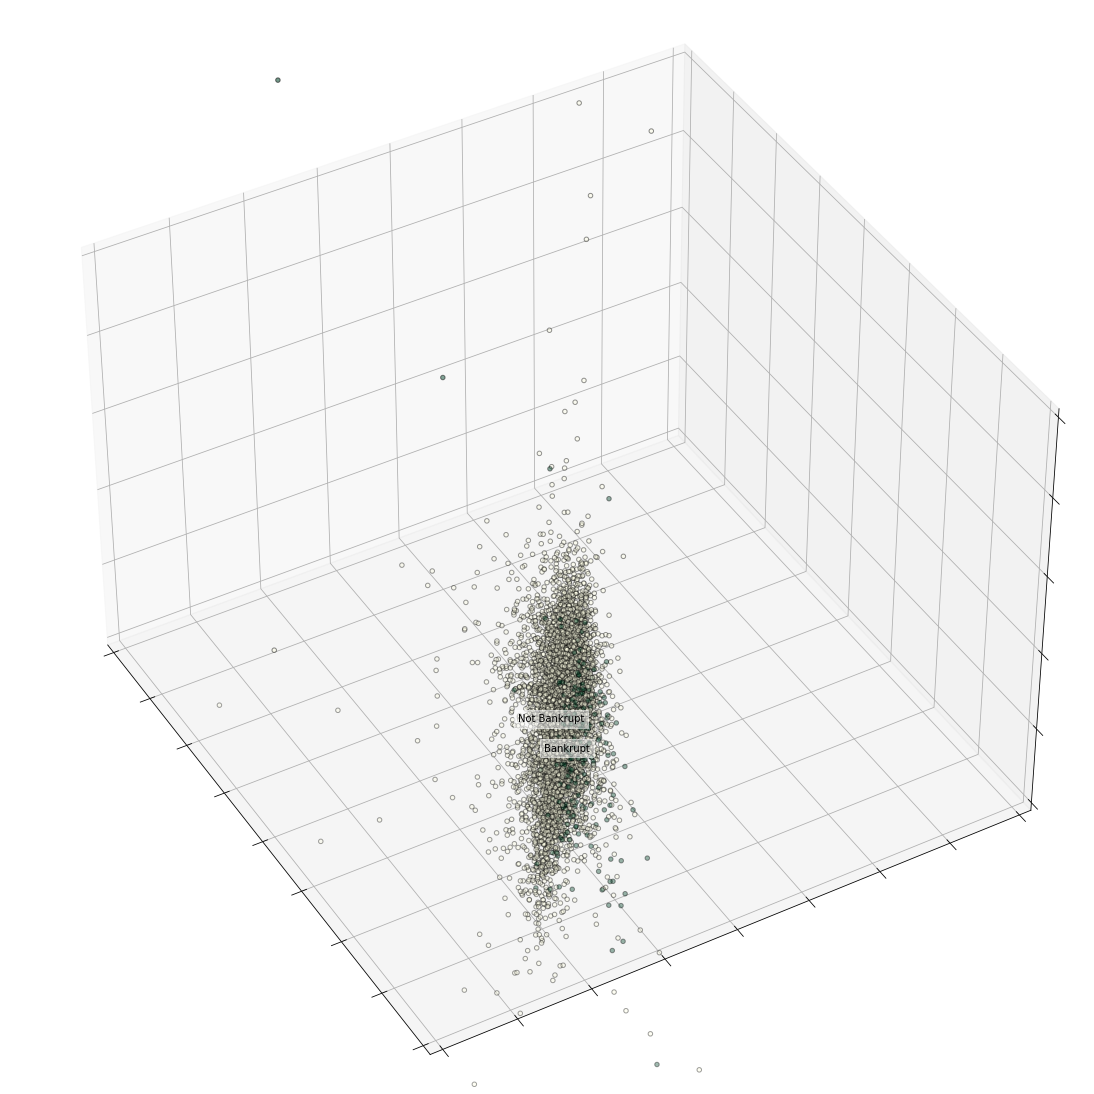

In [82]:
fig = plt.figure(1, figsize=(15, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=40, azim=150)

plt.cla()
pca = decomposition.PCA(n_components=20)
pca.fit(x)
scores = pca.transform(x)

for name, label in [('Bankrupt', 1), ('Not Bankrupt', 0)]:
    ax.text3D(scores[y == label, 0].mean(),
              scores[y == label, 1].mean() + 1.5,
              scores[y == label, 2].mean(),
               name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


ax.scatter(scores[:, 0], scores[:, 1], scores[:, 2], c=y, cmap='YlGn',
           edgecolor='k')

ax.set_xlim(-40,40)

ax.set_ylim(-40,40)

ax.set_zlim(0,10)


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [83]:
explained_variance = pca.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(explained_variance))
    

explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=4)) 
      

Explained variation per principal component: [0.13346977 0.07213753 0.05036682 0.0472448  0.04234713 0.03220201
 0.03049226 0.02934013 0.02801654 0.02155604 0.0205799  0.01982231
 0.01781151 0.01591869 0.01572232 0.01527418 0.01499282 0.01376761
 0.01251793 0.01238474]


In [84]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11', 'PC12', 'PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])


df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance


,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.0000
1,PC1,0.133470,0.1335
2,PC2,0.072138,0.2056
3,PC3,0.050367,0.2560
4,PC4,0.047245,0.3032
5,PC5,0.042347,0.3455
6,PC6,0.032202,0.3777
7,PC7,0.030492,0.4082
8,PC8,0.029340,0.4375
9,PC9,0.028017,0.4655


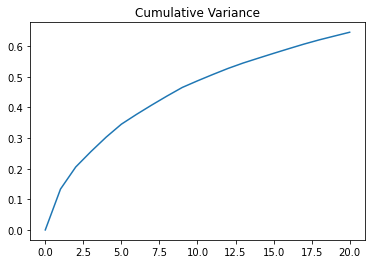

In [91]:
plt.plot(cumulative_variance)
plt.title("Cumulative Variance")
plt.show()

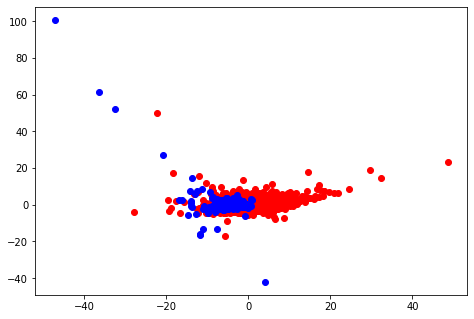

In [93]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(scores[y == 0, 0],scores[y == 0, 1], color='r')
ax.scatter(scores[y == 1,0],scores[y == 1, 1], color='b')

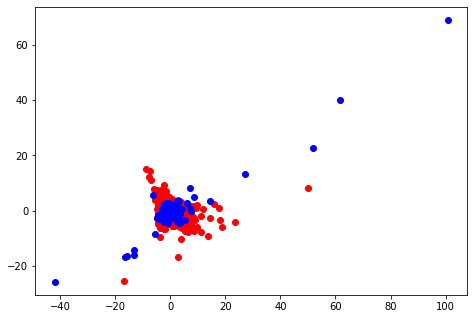

In [94]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(scores[y == 0, 1],scores[y == 0, 2], color='r')
ax.scatter(scores[y == 1,1],scores[y == 1, 2], color='b')

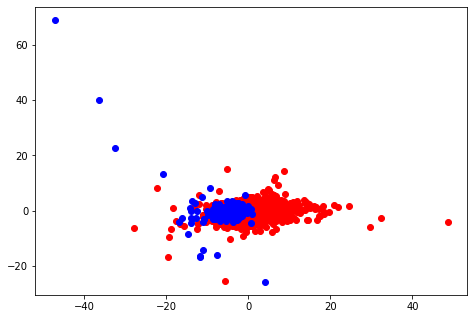

In [95]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(scores[y == 0, 0],scores[y == 0, 2], color='r')
ax.scatter(scores[y == 1,0],scores[y == 1, 2], color='b')